Para el desarrollo de este proyecto decidí hacer una analisis de datos de los reportes presentados por la Red de Monitoreo de Calidad del Aire de Bogotá para los perdiodos 01 de marzo a 01 de abril de 2024 de las estaciones Kennedy y Usaquen. Decidí escoger especificamente estas dos estaciones dada su ubicación urbana, que mide los mismos contaminantes y que es de adagio popular el hecho de que la localidad de Kennedy por su ubicación presenta mayores niveles de contaminación respecto a otras estaciones, en ese sentido escogí la estación de Usanquen dado que se ubica muy lejos de ella en uno de los secotores más exclusivos de la ciudad, donde se supone hay una mejor calidad del aire. 

Los conjuntos de datos se pueden descargar de: http://rmcab.ambientebogota.gov.co/Report/stationreport 

Estos datasets vienen presentados en tablas de excel con los datos de la media de concentración de las variables por cada hora. Las variables que se contienen ambos datasets son: 

- Fecha: Fecha general.
- Dia del mes: dìa del mes de 1 a 31.
- Dia de la semana: dia de la semana de lunes a domingo.
- Hora: Hora de la medición. Se mide en laposos de 60 minutos. 24 horas desde 01:00 a 00:000 del dìa siguiente.
- PM 10: media de concentración de Material Particulado de 10 micras en una hora, representado en µg/m3
- PM 2.5: media de concentración de Material Particulado de 2.5 micras en una hora, presentado en µg/m3
- CO: Monoxido de Carbono, media de concentración en partes por millon (ppm)
- NO: Monoxido de Nitrogeno, media de concentración en partes por billon (ppb)
- NO2: Dioxido de Nitrogenio, media de concentración en ppb.
- NOX: Oxidos de Nitrogenio, media de concentración en ppb.
- SO2: Dioxido de Azufre, media de concentración en ppb.
- Ozono: Ozono (O3) troposferico, media de concentración en ppb.
- Temperatura: Temperatura promedio en grados centigrados C° 
- Precipitación: Precipitación promedio en mm (milimetros).

Se debe recalcar que se hizo una transformación y limpieza de los conjuntos de datos a través de la herramienta Open Refine en la que basicamente se hace una imputación de los datos faltantes con el promedio por grupo, en este caso el grupo corresponde a la hora del día. Se hace el mismo procedimiento en ambos conjuntos de datos.
Se obtiene el dia de la semana y del mes a partir del de la fecha.  
De tal manera que se inicia con conjuntos de datos completamente limpios y homogeneos. 

Se debe tener claridad en que ambos conjuntos de datos tienen el mismo numero de filas (entradas), y columnas, y se modificó el dataset de tal manera que tuvieran el mismo orden de variables. 

### Objetivos: 

Comparar concentraciones de los contaminantes PM2.5, PM10 y O3 de las estaciones de monitoreo de calidad del aire de las localidades de Kennedy y Usaquen y determinar cual localidad presenta una mejor calidad del aire.

#### Objetivos especificos:

- Determinar el comportamiento y concentración de las variables PM2.5 y PM10 en ambas localidades. 
- Comparar el comportamiento y concentración de las variables de ambas localidas. 
- Determinar cual de las dos localidades presenta una mejor calidad del aire

### Hipotesis: 

- La localidad de Usaquen goza de una mejor calidad del aire con menores concentraciones de contaminantes PM2.5, PM10


In [17]:
#importación de librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium

## Ubicación de área de estudio 

Se escogen las localidades de Kennedy y de Usaquen dada su ubicación dentro de la ciudad; mientras que la primera se ubica al suroccidente de la ciudad y es una de las más pobladas, la otra se ubica al norte de la ciudad y tiene la alrededor de la mitad de la población que Kennedy. 

Las estaciones de monitoreo de calidad del aire de estas se ubican justo en la mitad de las mismas (o muy cerca de la mitad del poligono)

In [18]:
#ubicación estación kennedy
lon_estacion_kennedy= -74.16133333333335
lat_estacion_kennedy= 4.62505 

#ubicación estación usaquen
lat_estacion_usaquen = 4.71035
lon_estacion_usaquen = -74.03041666666667

# Ruta local al archivo GeoJSON
ruta_kennedy = "data/poligono_kennedy.geojson"
ruta_usaquen = "data/poligono_usaquen.geojson"

# Crear un mapa centrado en las coordenadas [43, -100]
m = folium.Map([4.6303473513560895, -74.15266762383382], zoom_start=11, width=600, height=400)

# Agregar la capa GeoJSON al mapa
folium.GeoJson(ruta_kennedy).add_to(m)
folium.GeoJson(ruta_usaquen).add_to(m)

#marcador Kennedy
folium.Marker(
    location=[lat_estacion_kennedy, lon_estacion_kennedy],
    popup=folium.Popup("Estación de monitoreo de Kennedy",max_width=100),
).add_to(m)

folium.Marker(
    location=[lat_estacion_usaquen, lon_estacion_usaquen],
    popup=folium.Popup(u"Estación de monitoreo de Usaquen", max_width="100%"),
).add_to(m)

m

### __Importación de los conjuntos de datos:__ 

Teniendo en cuenta que los conjuntos de datos corresponden a tablas de excel hago la importación de los datos a través de la librería __Pandas__.

Los archivos están dentro de una carpeta que está al mismo nivel que este notebook. Dentro de la carpeta hay tres archivos excel; uno con el reporte de la estación _Kennedy_, otro de la estación _Usaquen_ y otro que contiene la información general de ubicación de las estaciones de monitoreo. 

Adicionalmente contienen los archivos .geojson que contienen los poligonos de las localidades objeto de estudio. 

In [19]:
kennedy = pd.read_excel('data/ReporteKennedy.xlsx',
                        sheet_name='kennedy', 
                         header=0
                         )

usaquen = pd.read_excel('data/ReporteUsaquen.xlsx', 
                        sheet_name='usaquen', 
                        header=0)

In [20]:
# vista kennedy
kennedy.sample(3)

,Fecha,Dia del mes,Dia de la semana,Hora,PM10,PM2.5,CO,NO,NO2,NOX,SO2,Temperatura,Precipitacion,OZONO
603,2024-03-26,26,mar,04:00:00,42.3,20.8,0.7,1.2,15.6,16.8,1.4,11.9,0.0,7.1
275,2024-03-12,12,mar,12:00:00,80.9,37.4,0.7,9.7,13.2,22.9,1.4,21.0,0.0,22.9
124,2024-03-06,6,mié,05:00:00,100.9,47.4,1.3,46.1,33.4,79.4,4.3,11.2,0.0,0.9


In [21]:
#vista usaquen
usaquen.head(3)

,Fecha,Dia del mes,Dia de la semana,Hora,PM10,PM2.5,CO,NO,NO2,NOX,SO2,Temperatura,Precipitacion,OZONO
0,2024-03-01,1,vie,01:00:00,50.1,34.0,0.3,0.3,3.8,4.1,0.8,13.1,0.0,38.2
1,2024-03-01,1,vie,02:00:00,41.6,30.0,0.3,0.3,2.7,3.0,0.8,12.9,0.0,39.5
2,2024-03-01,1,vie,03:00:00,40.3,31.0,0.3,0.3,2.2,2.5,0.5,12.6,0.0,40.8


Iniciamos reconociendo las metricas de de los conjuntos de datos, para darnos una idea de lo que tratan.  

Para la estación _Kennedy_:

In [22]:
kennedy.describe()

,Fecha,Dia del mes,PM10,PM2.5,CO,NO,NO2,NOX,SO2,Temperatura,Precipitacion,OZONO
count,744,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2024-03-16 00:00:00,16.000000,69.825353,28.866962,0.990645,15.379065,18.922661,34.301868,3.140175,17.132675,0.026882,16.375591
min,2024-03-01 00:00:00,1.000000,29.600000,8.800000,0.300000,0.200000,0.400000,1.100000,1.200000,9.800000,0.000000,0.000000
25%,2024-03-08 00:00:00,8.000000,54.300000,21.175000,0.700000,1.600000,9.200000,12.975000,1.700000,14.300000,0.000000,5.000000
50%,2024-03-16 00:00:00,16.000000,66.700000,27.700000,0.900000,10.300000,17.200000,26.950000,2.300000,16.200000,0.000000,14.700000
75%,2024-03-24 00:00:00,24.000000,80.375000,34.600000,1.200000,18.800000,27.200000,45.750000,3.400000,20.300000,0.000000,24.300000
max,2024-03-31 00:00:00,31.000000,162.100000,77.200000,3.200000,138.600000,60.200000,189.200000,39.900000,27.500000,5.800000,56.400000
std,NaN,8.950289,22.079627,10.592934,0.460614,20.302571,11.723283,29.985990,2.943745,3.767330,0.299624,13.054586


Pasamos a las metricas descriptivas de _Usaquen_

In [23]:
usaquen.describe()

,Fecha,Dia del mes,PM10,PM2.5,CO,NO,NO2,NOX,SO2,Temperatura,Precipitacion,OZONO
count,744,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2024-03-16 00:00:00,16.000000,38.503978,25.199086,0.515161,4.048001,8.965677,13.017067,1.006532,14.881855,0.054167,29.305685
min,2024-03-01 00:00:00,1.000000,9.000000,0.000000,0.000000,0.300000,1.400000,1.800000,0.200000,9.000000,0.000000,0.900000
25%,2024-03-08 00:00:00,8.000000,28.900000,19.000000,0.400000,1.840000,5.892000,8.700000,0.700000,12.575000,0.000000,20.700000
50%,2024-03-16 00:00:00,16.000000,36.700000,25.000000,0.500000,2.970000,7.720000,10.520000,0.900000,14.000000,0.000000,29.400000
75%,2024-03-24 00:00:00,24.000000,45.625000,31.000000,0.600000,4.007000,11.000000,14.320000,1.100000,17.100000,0.000000,37.750000
max,2024-03-31 00:00:00,31.000000,97.300000,57.000000,2.200000,79.400000,40.000000,102.600000,4.100000,22.900000,8.100000,90.600000
std,NaN,8.950289,13.764795,9.505132,0.244947,5.412628,5.152756,9.478619,0.442600,3.104840,0.481204,14.579673


Hasta este punto nuestros conjuntos de datos solo tienen una variable categorica que corresponde al día de la semana (lunes a domingo).

In [24]:
kennedy.describe(include=object)

,Dia de la semana,Hora
count,744,744
unique,7,24
top,vie,01:00:00
freq,120,31


In [25]:
dia_sem = kennedy.groupby('Dia de la semana')['Dia del mes'].nunique() #agrupar por dia y contar valores unicos

usaquen.groupby('Dia de la semana')['Dia del mes'].nunique() #para verificar que también se cumpla en este dataset

Dia de la semana
dom    5
jue    4
lun    4
mar    4
mié    4
sáb    5
vie    5
Name: Dia del mes, dtype: int64

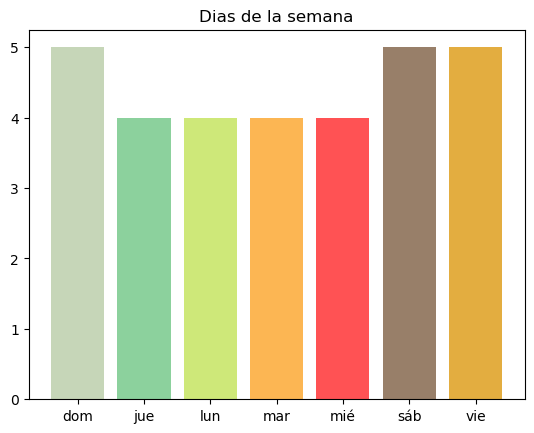

In [26]:
colores_dias = {'lun':'#c6d6b8', 
           'mar': '#8cd19d', 
           'mié': '#cee879', 
           'jue': '#fcb653', 
           'vie': '#ff5254', 
           'sáb': '#987f69',
           'dom' : '#e3ad40'}

plt.bar(x= dia_sem.index,
        height=dia_sem, 
        color = colores_dias.values()
        )
plt.title('Dias de la semana')

plt.show()

Como vemos, durante el mes de marzo de 2024, hay mas registros para los días viernes, sabado y domingo. Es decir, hay 5 viernes, 5 sabados y 5 domingos en marzo, mientras solo hay 4 lunes, 4 martes, etc.

Haste este punto es un poco complejo entender realmente lo que los conjuntos de datos tiene para mostrarnos. Queremos saber si existe una correlación entre las variables, para lo cual lo mejor es un grafico. 

In [27]:
#solo tendremos en cuenta variables numericas, por lo que quitaremos las variables fecha y hora

kennedy_correlacion = kennedy.drop(['Fecha',
                                    'Dia de la semana', 
                                    'Dia del mes', 
                                    'Hora'], axis=1).corr() 

usaquen_correlacion = usaquen.drop(['Fecha', 
                                    'Dia de la semana', 
                                    'Dia del mes', 
                                    'Hora'], axis=1).corr() #.corr me indica correlación entre variables

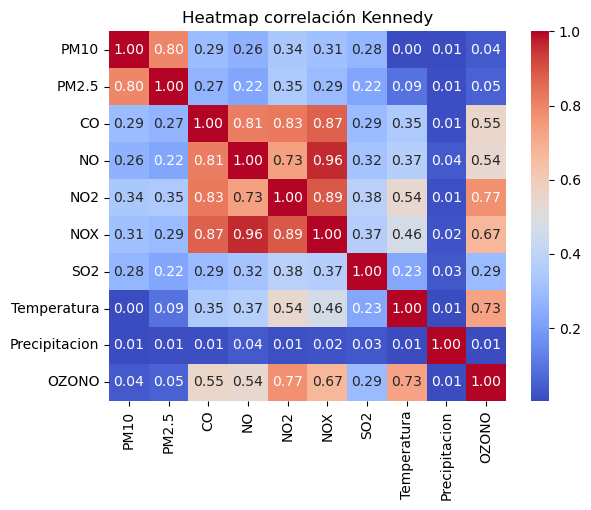

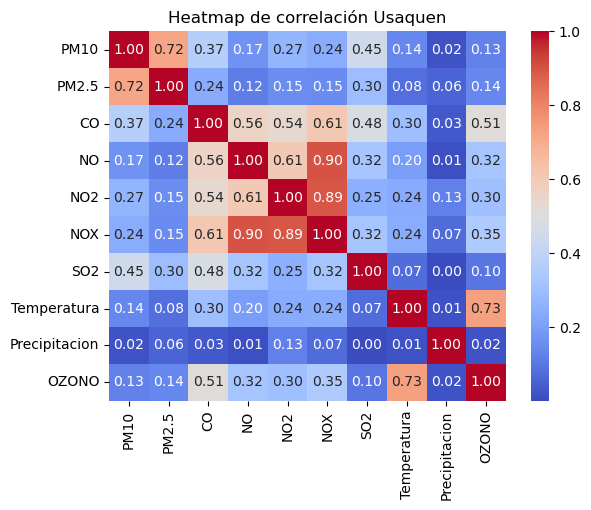

In [28]:
# Creamos el heatmap kennedy
sns.heatmap(kennedy_correlacion.abs(),      #abs calcula el valor absoluto
            annot=True,                    #Muestra valor de los datos en cada celda
            cmap='coolwarm',               #como paleta de colores
            fmt=".2f",
            )                     
plt.title("Heatmap correlación Kennedy")
plt.show()

# Creamos el heatmap
sns.heatmap(usaquen_correlacion.abs(),      #abs calcula el valor absoluto
            annot=True,                    #Muestra valor de los datos en cada celda
            cmap='coolwarm',               #como paleta de colores
            fmt=".2f",
            )                     
plt.title('Heatmap de correlación Usaquen')        
plt.show()

- En primera instancia observamos en ambos conjuntos de datos tenemos una desviación estandar no muy alejada de la media en cada una de las variables, lo que me indica buena consistencia en ambos conjuntos de datos. 

- Cuando observamos la correlación entre las variables de _kennedy_ nos damos cuenta que bastantes variables se correlacionan, solo basta con ver los puntos con tono naranja y pastel. Es interesante ver la correlación entre los PM (PM10 y PM2.5), del CO con cada uno de los compuestos que tienen Nitrogeno, de la temperatura con la concentración de Ozono troposferico y del Dioxido de Nitrogeno (NO2) con el Ozono.

- Aunque las anteriores fueron las variables que más se correlacionan no deja de ser interesante la correlación entre el Monoxido de Carbono (CO) y Monoxido de Nitrogeno (NO) con el Ozono, al igual que el de la temperatura con Dioxido de Nitrogeno (NO2).

- Para el caso de _Usaquen_ vemos correlaciones entre los PM, el CO con los compuestos que tienen nitrogeno, la temperaturacon el Ozono. Correlacioens similares a las halladas en _Kennedy_. Sin embargo, no existe la misma correlación fuerte entre el Monoxido de Carbono (CO) y Monoxido de Nitrogeno (NO) con el Ozono, al igual que el de la temperatura con Dioxido de Nitrogeno (NO2). En eso se diferencian ambos mapas de calor. 

- Podemos empezar a inferir que las diferentes compuestos y presentes en el aire tienen correlación positiva, es decir, la presencia y concentración de uno promueve la de otro; como es el caso de los PM y del Monoxido de Carbono (CO) con los compuestos que contienen nitrogeno. 

### Escalamiento, estandarización y codificación

La legislación Colombiana a través de la Resolución 2254 del 2017 del MADS, estableció los niveles maximos permisibles para diversos contaminates en el aire, entre ellos PM10 y PM2.5.

__Partículas en suspensión (PM2.5):__
- Promedio diario: Promedio de 37 μg/m³.

__Particulas en suspensión (PM10):__
- Exposición maxima diaría: No debe superar los 75 μg/m³

En ese orden de ideas es prudente determinar a partir de los conjuntos de datos que tengo si en algún momento del mes de marzo del presente año se infringió los limites permisibles en cuanto a los contaminantes PM2.5 y PM10.

Teniendo en cuenta que los conjuntos de datos me presentan los niveles de concentración de contaminante en periodos de una hora, pero la ley los establece limites para 24 horas debo hacer una transformación de mis datos. En este sentido voy a agrupar los datos por día y establecer el promedio de la concentración diaria. 

In [29]:
#agrupo por dia del mes y promediar las variables 
kennedy_df = kennedy.groupby('Dia del mes')[['PM2.5',       
                                            'PM10', 
                                            'OZONO',        #solo para efectos del ejercicio
                                            'Temperatura']  #solo para efectos del ejercicio
                                            ].mean() #el promedio diario de concentración

usaquen_df = usaquen.groupby('Dia del mes')[['PM2.5', 'PM10', 'OZONO','Temperatura']].mean()

In [30]:
#tabla transitoria de calendario (dia del mes y dia de la semana)
calendar = kennedy.drop_duplicates('Dia del mes')
calendar = calendar[['Dia del mes', 'Dia de la semana']]

In [31]:
#quiero que los dataframes tengan el dia de la semana 
kennedy_df = kennedy_df.join(calendar.set_index(['Dia del mes']), on='Dia del mes')
usaquen_df = usaquen_df.join(calendar.set_index(['Dia del mes']), on='Dia del mes')

In [32]:
#categorizo variables 
#exposición de PM2.5 kennedy
kennedy_df['Exposición PM2.5'] = kennedy_df['PM2.5'].apply(lambda x: 'No excede' if x <= 37 else'Excede')
#exposición de PM10 kennedy
kennedy_df['Exposición PM10'] = kennedy_df['PM10'].apply(lambda x: 'No excede' if x <= 75 else'Excede')

#exposición de PM2.5 usaquen
usaquen_df['Exposición PM2.5'] = usaquen_df['PM2.5'].apply(lambda x: 'No excede' if x <= 37 else'Excede')
#exposición de PM10 usaquen
usaquen_df['Exposición PM10'] = usaquen_df['PM10'].apply(lambda x: 'No excede' if x <= 75 else'Excede')

En este punto ya tenemos dos Dataframes llamados 'kennedy_df' y 'usaquen_df' que contienen la concentración diaria promedio de los contaminantes PM2.5, PM10 y O3 y su categorización como 'Excede' y 'No excede' de acuerdo con los limites permisibles de la ley colombiana.

In [33]:
# vista kennedy_df
kennedy_df.sample(5)

,PM2.5,PM10,OZONO,Temperatura,Dia de la semana,Exposición PM2.5,Exposición PM10
Dia del mes,,,,,,,
1,28.487500,76.212500,25.837500,16.991667,vie,No excede,Excede
17,22.945833,53.075000,12.633333,17.620833,dom,No excede,No excede
26,21.995833,67.666667,19.541667,16.429167,mar,No excede,No excede
3,26.383333,57.300000,27.683333,17.158333,dom,No excede,No excede
30,30.691667,62.650000,15.000000,15.675000,sáb,No excede,No excede


In [34]:
usaquen_df.sample(5)

,PM2.5,PM10,OZONO,Temperatura,Dia de la semana,Exposición PM2.5,Exposición PM10
Dia del mes,,,,,,,
25,22.454583,36.652500,24.908333,15.320833,lun,No excede,No excede
27,20.565833,42.904167,23.637500,14.891667,mié,No excede,No excede
23,43.666667,62.220833,37.029167,15.895833,sáb,Excede,No excede
29,30.375000,43.858333,30.920833,15.325000,vie,No excede,No excede
17,22.141667,30.308333,31.175000,14.666667,dom,No excede,No excede


Me interesa ver las distribuciones de cada una de estas variables y compararlas. Para que esto tenga lugar debo tenerlas en una misma escala, por ello a partir de los dfs originales escalamos.

En este caso usaremos 'MinMaxScaler' que lo que hace es llevarme estos datos a un rango entre 0 y 1, manteniedo la distribución de los datos pero ahora todos están dentro del mismo rango, lo que a la hora de graficar permitirá ver mejor sus distribuciones. 

In [35]:
#libreria necesaria para escalar
import sklearn 
from sklearn.preprocessing import MinMaxScaler #metodo que voy a usar

In [36]:
#escalos df de kennedy 
kennedy_df_scaled = MinMaxScaler().fit_transform(kennedy_df[['PM2.5',       
                                            'PM10', 
                                            'OZONO',
                                            'Temperatura']])
#guardar con DF
kennedy_df_scaled = pd.DataFrame(kennedy_df_scaled)

#importar nombre de columnas 
kennedy_df_scaled.columns = kennedy_df[['PM2.5',       
                                            'PM10', 
                                            'OZONO',
                                            'Temperatura']].columns

kennedy_df_scaled.head(5)

,PM2.5,PM10,OZONO,Temperatura
0,0.402836,0.534384,0.885304,0.364475
1,0.639994,0.750411,1.000000,0.381776
2,0.329764,0.236256,0.972457,0.410611
3,0.400521,0.354483,0.589219,0.433679
4,0.434814,0.536486,0.448161,0.432526


In [37]:
#escalos df de usaquen 
usaquen_df_scaled = MinMaxScaler().fit_transform(usaquen_df[['PM2.5',       
                                            'PM10', 
                                            'OZONO',
                                            'Temperatura']])
#guardar con DF
usaquen_df_scaled = pd.DataFrame(usaquen_df_scaled)

#importar nombre de columnas 
usaquen_df_scaled.columns = usaquen_df[['PM2.5',       
                                            'PM10', 
                                            'OZONO',
                                            'Temperatura']].columns

usaquen_df_scaled.head(5)

,PM2.5,PM10,OZONO,Temperatura
0,0.561626,0.675642,1.000000,0.832090
1,0.632783,0.706150,0.908181,0.768657
2,0.373571,0.308895,0.640098,0.440299
3,0.374841,0.443245,0.062500,0.147388
4,0.538755,0.532657,0.502458,0.492537


Esto realmente no dice nada, es mejor verlo en una grafica. Para entenderlo mejor veremos las distribuciones de las 4 variables de la siguiente manera dada su correlación, pues ambos pares presentan correlación alta: 

- Distribución de Material Particulado PM2.5 y PM10
- Distribución O3 y Temperatura 

In [38]:
#colores 
color_kennedy = '#ed303c'
color_usaquen = '#3b8183'

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

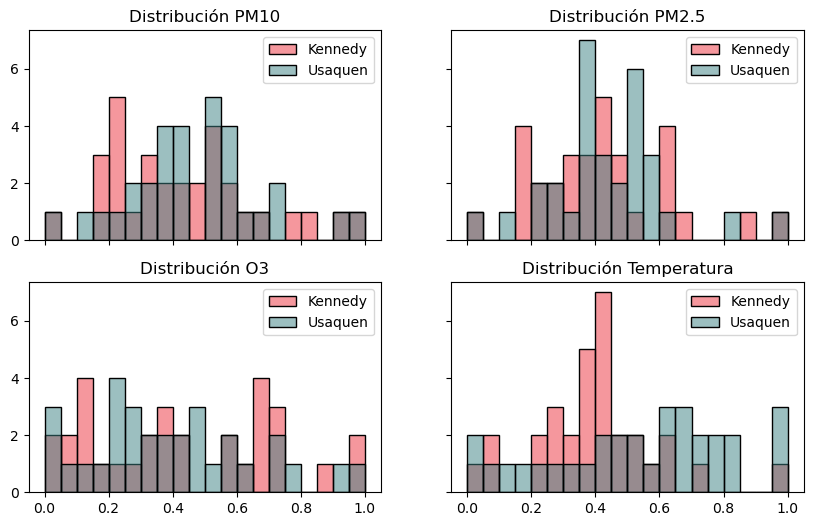

In [39]:
fig, axes = plt.subplots(2, # filas
                         2, #columnas
                         figsize=(10,6), #tamaño de lienzo
                         sharex=True, #compartir eje x
                         sharey=True) #compartir eje y

#distribuciones PM10 ambas estaciones
sns.histplot(ax=axes[0,0], 
            data=kennedy_df_scaled["PM10"], 
            bins=20,                        
            alpha=0.5, 
            color= color_kennedy, 
            label="Kennedy")
sns.histplot(ax=axes[0,0], 
            data=usaquen_df_scaled["PM10"], 
            bins=20,                        
            alpha=0.5, 
            color=color_usaquen, 
            label="Usaquen")
#contexto 
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribución PM10")
axes[0,0].legend()

#distribución PM2.5 ambas estaciones. 
sns.histplot(ax=axes[0,1], 
           data=kennedy_df_scaled["PM2.5"], 
           bins=20, 
           alpha=0.5,
           color=color_kennedy, 
           label="Kennedy")

sns.histplot(ax=axes[0,1], 
           data=usaquen_df_scaled["PM2.5"], 
           bins=20, 
           alpha=0.5,
           color= color_usaquen, 
           label="Usaquen")
#contexto
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribución PM2.5")
axes[0,1].legend()


#variables OZONO y Temperatura 
sns.histplot(ax=axes[1,0], 
            data=kennedy_df_scaled["OZONO"], 
            bins=20,                        
            alpha=0.5, 
            color=color_kennedy, 
            label="Kennedy")

sns.histplot(ax=axes[1,0], 
            data=usaquen_df_scaled["OZONO"], 
            bins=20,                        
            alpha=0.5, 
            color=color_usaquen, 
            label="Usaquen")

axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribución O3")
axes[1,0].legend()


sns.histplot(ax=axes[1,1], 
           data=kennedy_df_scaled["Temperatura"], 
           bins=20, 
           alpha=0.5,
           color=color_kennedy, 
           label="Kennedy")

sns.histplot(ax=axes[1,1], 
           data=usaquen_df_scaled["Temperatura"], 
           bins=20, 
           alpha=0.5,
           color=color_usaquen, 
           label="Usaquen")

axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribución Temperatura")
axes[1,1].legend()
plt.show()

Observamos que la variable __PM10__ para __Usaquen__ tiende a tener una distribución normal mientras que la mima para __Kennedy__ tiene una asimetria positiva, no demasiado clara. 

En el caso de PM2.5 vemos distribuciones más o menos normales en cada una (Usaquen y Kennedy) 

Sin embargo, cuando vemos la variable O3 vemos una distribución más uniforme. Lo mismo ocurre para la temperatura en Usaquen, pero con un comportamiento diferentes en Kennedy que tiende a la normalidad. 

Ahora quisiera ver un scatterplot entre estos pares de variables:

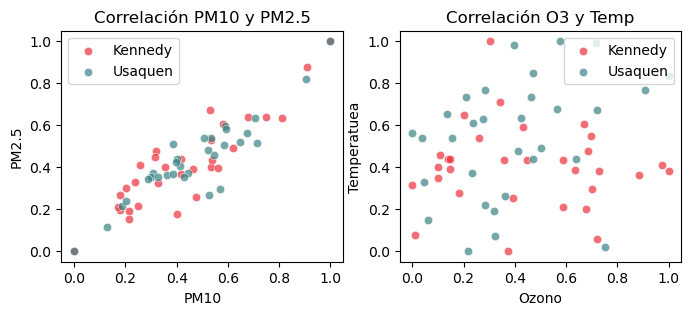

In [40]:
fig, axes = plt.subplots(1,2,figsize=(8,3), sharex=True, sharey=False)

##Correlación variables PM10 y PM2.5 KENNEDY
sns.scatterplot(ax=axes[0], 
                data=kennedy_df_scaled,
                x="PM10", 
                y="PM2.5",
                color=color_kennedy, 
                label="Kennedy", 
                alpha=0.7)

##Correlación variables PM10 y PM2.5 USAQUEN
sns.scatterplot(ax=axes[0], 
                data=usaquen_df_scaled,
                x="PM10", 
                y="PM2.5",
                color= color_usaquen, 
                label="Usaquen", 
                alpha=0.7)

axes[0].set_xlabel("PM10")
axes[0].set_ylabel("PM2.5")
axes[0].set_title("Correlación PM10 y PM2.5") 
axes[0].grid(False)


##Correlación variables O3 y Temp
sns.scatterplot(ax=axes[1], 
                data=kennedy_df_scaled,
                x="OZONO", 
                y="Temperatura",
                color= color_kennedy, 
                label="Kennedy", 
                alpha=0.7)

##Correlación variables O3 y Temp
sns.scatterplot(ax=axes[1], 
                data=usaquen_df_scaled,
                x="OZONO", 
                y="Temperatura",
                color=color_usaquen, 
                label="Usaquen", 
                alpha=0.7)

axes[1].set_xlabel("Ozono")
axes[1].set_ylabel("Temperatuea")
axes[1].set_title("Correlación O3 y Temp") 
axes[1].grid(False)

Como vemos hay una clara correlación entre los PMs, que es interesante y de cierto modo esperado dado lo arrojado por la matriz de correlación. Pero no ocurre lo mismo con la Temperatura y el O3.

Esto en cuanto a las variables escaladas, pero ¿que ocurre realmente con las variables en su escala original?

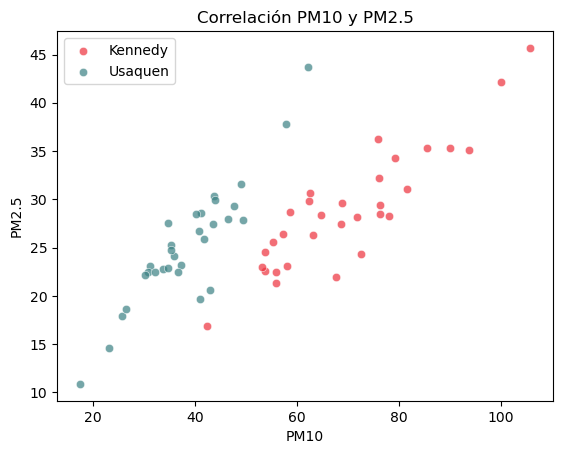

In [41]:
##Correlación variables PM10 y PM2.5 KENNEDY
sns.scatterplot(#ax=axes[0], 
                data=kennedy_df,
                x="PM10", 
                y="PM2.5",
                color=color_kennedy, 
                label="Kennedy", 
                alpha=0.7)

##Correlación variables PM10 y PM2.5 USAQUEN
sns.scatterplot(#ax=axes[0], 
                data=usaquen_df,
                x="PM10", 
                y="PM2.5",
                color=color_usaquen, 
                label="Usaquen", 
                alpha=0.7, 
                )

axes[0].set_xlabel("PM10")
axes[0].set_ylabel("PM2.5")
plt.title("Correlación PM10 y PM2.5") 
axes[0].grid(False)


Este grafico ya nos muestra que para __Kennedy__ la concentración de los contaminantes es mayor que en __Usaquen__, incluso presentado unos puntos bastante elevados en algunas ocasiones. Pueden estos puntos considerarse outliers, miremos la distribución de las variables desde un punto de vista de boxplot. 

Text(0.5, 1.0, 'Distribución PM 2.5 Usaquen')

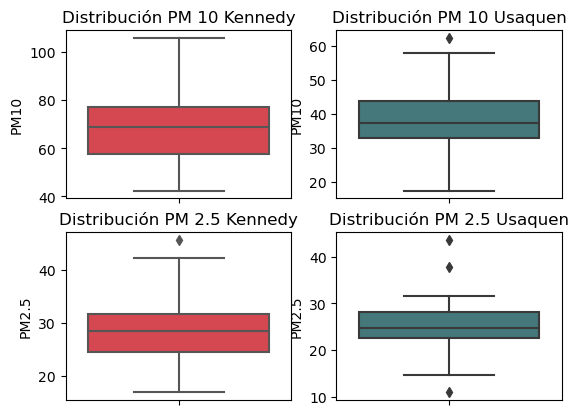

In [42]:
#boxplot PM10 Keneddy
plt.subplot(2,2,1)
sns.boxplot(data=kennedy_df,
            y='PM10', 
            showfliers=True, 
            color= color_kennedy)
plt.title('Distribución PM 10 Kennedy')

#boxplot PM10 de USaquen
plt.subplot(2,2,2)
sns.boxplot(data=usaquen_df,
            y='PM10', 
            showfliers=True, 
            color=color_usaquen)
plt.title('Distribución PM 10 Usaquen')

#boxplot PM2.5 de Keneedy
plt.subplot(2,2,3)
sns.boxplot(data=kennedy_df,
            y='PM2.5', 
            showfliers=True, 
            color=color_kennedy)
plt.title('Distribución PM 2.5 Kennedy')

#boxplot PM2.5 de USaquen
plt.subplot(2,2,4)
sns.boxplot(data=usaquen_df,
            y='PM2.5', 
            showfliers=True, 
            color=color_usaquen)
plt.title('Distribución PM 2.5 Usaquen')

De acuerdo con esto, vemos que si hay valores atipicos en las distribuciones de los datos de PM10 de Usaquen, y PM2.5 en cada localidad. 

Pero ahora me interesa saber si los niveles de PM10 y PM2.5 excedieron los limites maximos permisibles por la normatividad. Para eso planteamos la distribución de los datos mensualmente viendo el grafico de dispersión de las concentraciones de los contaminantes. 

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

Text(0.5, 1.0, 'Usaquen: PM10')

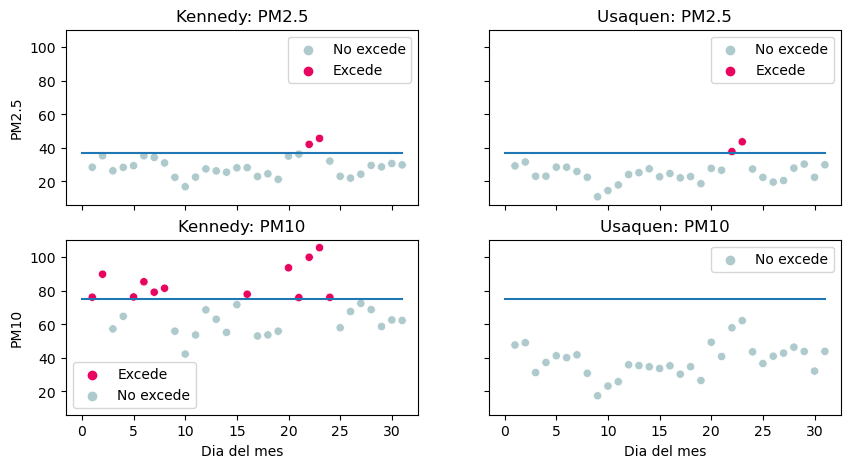

In [43]:
fig, axes = plt.subplots(2,2, figsize=(10,5), sharey=True, sharex=True)

colores = {'No excede':'#afcacc', 
           'Excede': '#e80560'}

limitPM25 = 37
limitPM10 = 75

sns.scatterplot(data = kennedy_df, 
            x='Dia del mes', 
            y='PM2.5', 
            hue='Exposición PM2.5', 
            #color = 'red', 
            ax=axes[0,0],
            palette= colores
            )
sns.lineplot(x=np.array(range(0,32)), 
             y= limitPM25, 
             ax=axes[0,0])
axes[0,0].set_title('Kennedy: PM2.5')


sns.scatterplot(data = kennedy_df, 
            x='Dia del mes', 
            y='PM10', 
            hue='Exposición PM10', 
            #color = 'red', 
            ax=axes[1,0], 
            palette= colores
            )
sns.lineplot(x=np.array(range(0,32)), 
             y= limitPM10, 
             ax=axes[1,0])
axes[1,0].set_title('Kennedy: PM10')


sns.scatterplot(data = usaquen_df, 
            x='Dia del mes', 
            y='PM2.5', 
            hue='Exposición PM2.5', 
            #color = 'red', 
            ax=axes[0,1],
            palette= colores
            )
sns.lineplot(x=np.array(range(0,32)), 
             y= limitPM25, 
             ax=axes[0,1])

axes[0,1].set_title('Usaquen: PM2.5')


sns.scatterplot(data = usaquen_df, 
            x='Dia del mes', 
            y='PM10', 
            hue='Exposición PM10', 
            #color = 'red', 
            ax=axes[1,1], 
            palette= colores
            )
sns.lineplot(x=np.array(range(0,32)), 
             y= limitPM10, 
             ax=axes[1,1])
axes[1,1].set_title('Usaquen: PM10')

En ambos casos se excedió el limite permisible de PM2.5 en dos ocasiones, incluso llama la atención que parece ser que fue en la misma fecha. 

Para el caso de PM10 si vemos que en Kennedy se excedieron los limites en varias ocasiones, mientras que en Usaquen nunca. 

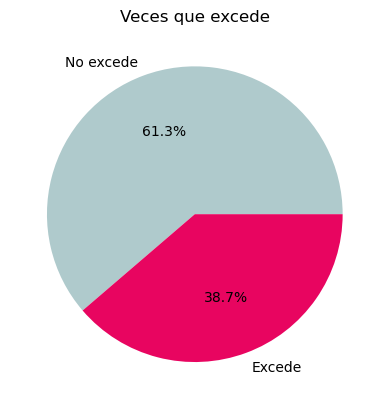

In [44]:
veces_excede = kennedy_df['Exposición PM10'].value_counts()

plt.pie(x=veces_excede.values, 
        colors= colores.values(), 
        labels= veces_excede.index, 
        autopct = '%1.1f%%')
plt.title('Veces que excede')
plt.show()

Sin embargo, algo interesante es que esto me muestra el promedio del día, pero ¿como nos podemos dar una idea de lo que paso en el día a día?

In [45]:
colores_contaminantes = {'NO':'#000000', 
                         'NO2':'#ed0b65', 
                         'SO2': '#b2a700',
                         'NOX': '#fcae11',
                         'OZONO':'#770493', 
                         'PM2.5': '#79dd7e', 
                         'PM10': '#21b6b6'
                         }

/tmp/ipykernel_6622/510875615.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(kennedy, x='Dia del mes', y='PM2.5', label='PM2.5', ax=axes[0], alpha=0.7, palette=colores_contaminantes)
/tmp/ipykernel_6622/510875615.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(kennedy, x='Dia del mes', y='PM10', label='PM10', ax=axes[0], alpha=0.7, palette=colores_contaminantes )
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

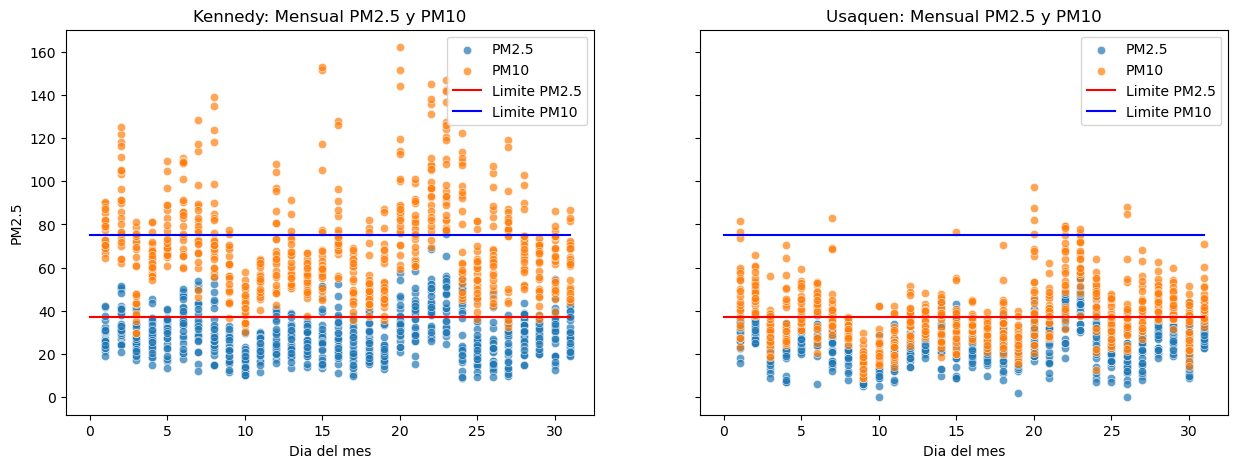

In [46]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
sns.scatterplot(kennedy, x='Dia del mes', y='PM2.5', label='PM2.5', ax=axes[0], alpha=0.7, palette=colores_contaminantes)
sns.scatterplot(kennedy, x='Dia del mes', y='PM10', label='PM10', ax=axes[0], alpha=0.7, palette=colores_contaminantes )
sns.lineplot(x=np.array(range(0,32)), y= limitPM25, color='red', label='Limite PM2.5', ax=axes[0])
sns.lineplot(x=np.array(range(0,32)), y= limitPM10, color='blue', label='Limite PM10', ax=axes[0])

axes[0].set_title('Kennedy: Mensual PM2.5 y PM10')

sns.scatterplot(usaquen, x='Dia del mes', y='PM2.5', label='PM2.5', ax=axes[1], alpha=0.7, palette=colores_contaminantes)
sns.scatterplot(usaquen, x='Dia del mes', y='PM10', label='PM10', ax=axes[1],  alpha=0.7, palette=colores_contaminantes)
sns.lineplot(x=np.array(range(0,32)), y= limitPM25, color='red', label='Limite PM2.5', ax=axes[1])
sns.lineplot(x=np.array(range(0,32)), y= limitPM10, color='blue', label='Limite PM10', ax=axes[1])

axes[1].set_title('Usaquen: Mensual PM2.5 y PM10')

plt.show()

Como vemos en muchas ocasiones los registros de la concentración de los contamiantes supera los limites permisibles. Sin embargo, la normatividad colombiana no contempla periodos de exposición de una hora para estos contaminantes, por lo que técnicamente no se está excediendo los limites. Esto más bien nos da una idea de qué es lo que courrió en el día.

Pero, si es muy claro que los contaminates tienen una menor concentración y menos picos en Usaquen, incluso el limite se excede muy pocas veces. ¿Acaso el comportamiento cambia de acuerdo al día de la semana?

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

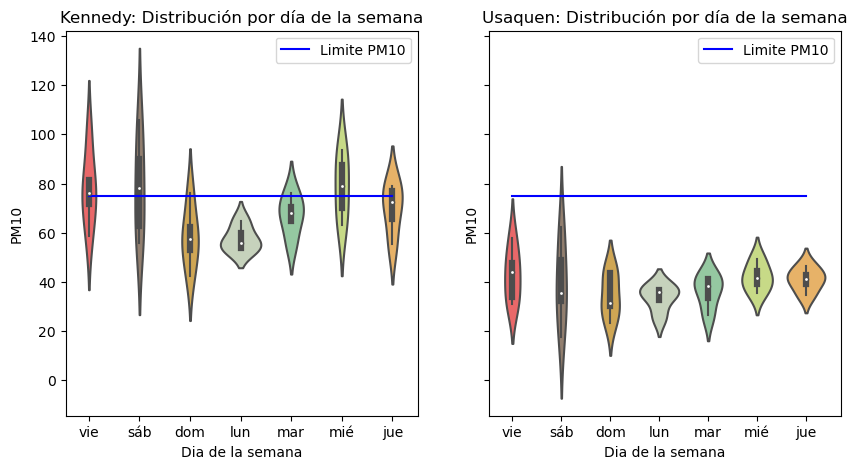

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)

#violin de Kennedy, por dia de la semana
sns.violinplot(kennedy_df,              #usando df con promedio diario
               x='Dia de la semana', 
               y='PM10', 
               ax=axes[0], 
               palette=colores_dias)
#linea de limite
sns.lineplot(x=np.array(range(0,7)), y= limitPM10, color='blue', label='Limite PM10', ax=axes[0])
axes[0].set_title('Kennedy: Distribución por día de la semana')

#violin de USaquen por dia de la semana
sns.violinplot(usaquen_df, x='Dia de la semana', y='PM10', ax=axes[1], palette=colores_dias)
#linea de limite p
sns.lineplot(x=np.array(range(0,7)), y= limitPM10, color='blue', label='Limite PM10', ax=axes[1])
axes[1].set_title('Usaquen: Distribución por día de la semana')

plt.show()

Vemos nuevamente, viendo la distribución de datos por semana, que __Kennedy__ presenta niveles diarios promedio superiores a los presentados en __Usaquen__. 

Algo interesante que nos muestra esta grafica es que el lunes en __Kennedy__ no se excede el limite ¿Por qué?. Otra cosa interesante es que el sabado, en ambos casos, parece que la distribución de los datos se alarga, aunque las concentraciones son diferentes. 

Aún así inquieta ver que ocurre con el comportamiento general de los demás contaminantes visto desde una perspectiva mensual (diaría por el periodo de un mes)

In [48]:
#creamos dfs con valores agrupados por dia
kennedy_prom_concentracion_dia = kennedy.groupby('Dia del mes')[[
 'PM10',
 'PM2.5',
 'CO',
 'NO',
 'NO2',
 'NOX',
 'SO2',
 'Temperatura',
 'Precipitacion',
 'OZONO']].mean()

In [49]:
usaquen_prom_concentracion_dia = usaquen.groupby('Dia del mes')[[
 'PM10',
 'PM2.5',
 'CO',
 'NO',
 'NO2',
 'NOX',
 'SO2',
 'Temperatura',
 'Precipitacion',
 'OZONO']].mean()

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

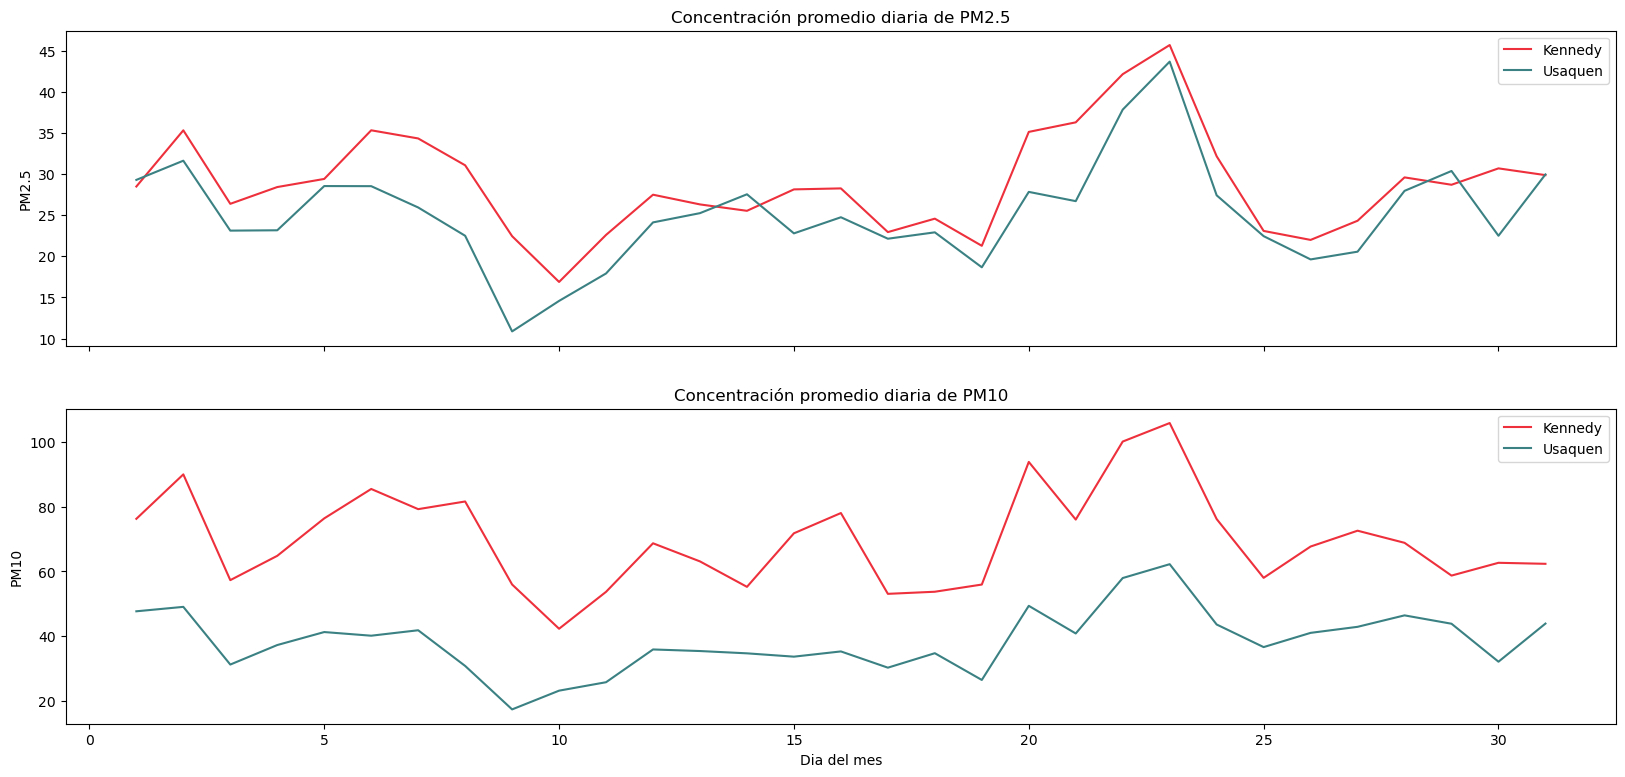

In [50]:
#vamos a graficar lineplots

fig, axes = plt.subplots(2,#filas
                         1, #columa
                         figsize=(20,9), 
                         sharex=True
                         )  

hrs = list(range(0, 25))

#concentración media diaria de PM2.5
sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='PM2.5', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[0])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='PM2.5', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[0])

axes[0].set_title('Concentración promedio diaria de PM2.5')

#concentración media diaria de PM10
sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='PM10', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='PM10', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[1])

axes[1].set_title('Concentración promedio diaria de PM10')

plt.show()

Aquí lo interesante es que las lineas siguen un patrón similar (cuando una sube la otra igual, cuando una baja la otra lo sigue, se debe a la correlación entre las mismas) manteniendose por debajo la linea de Usaquen en la mayoríade los casos.

¿Pero que ocurre con los demás contaminantes? Veamos comparando aquellos que se encuentra en la misma unidad de medida

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

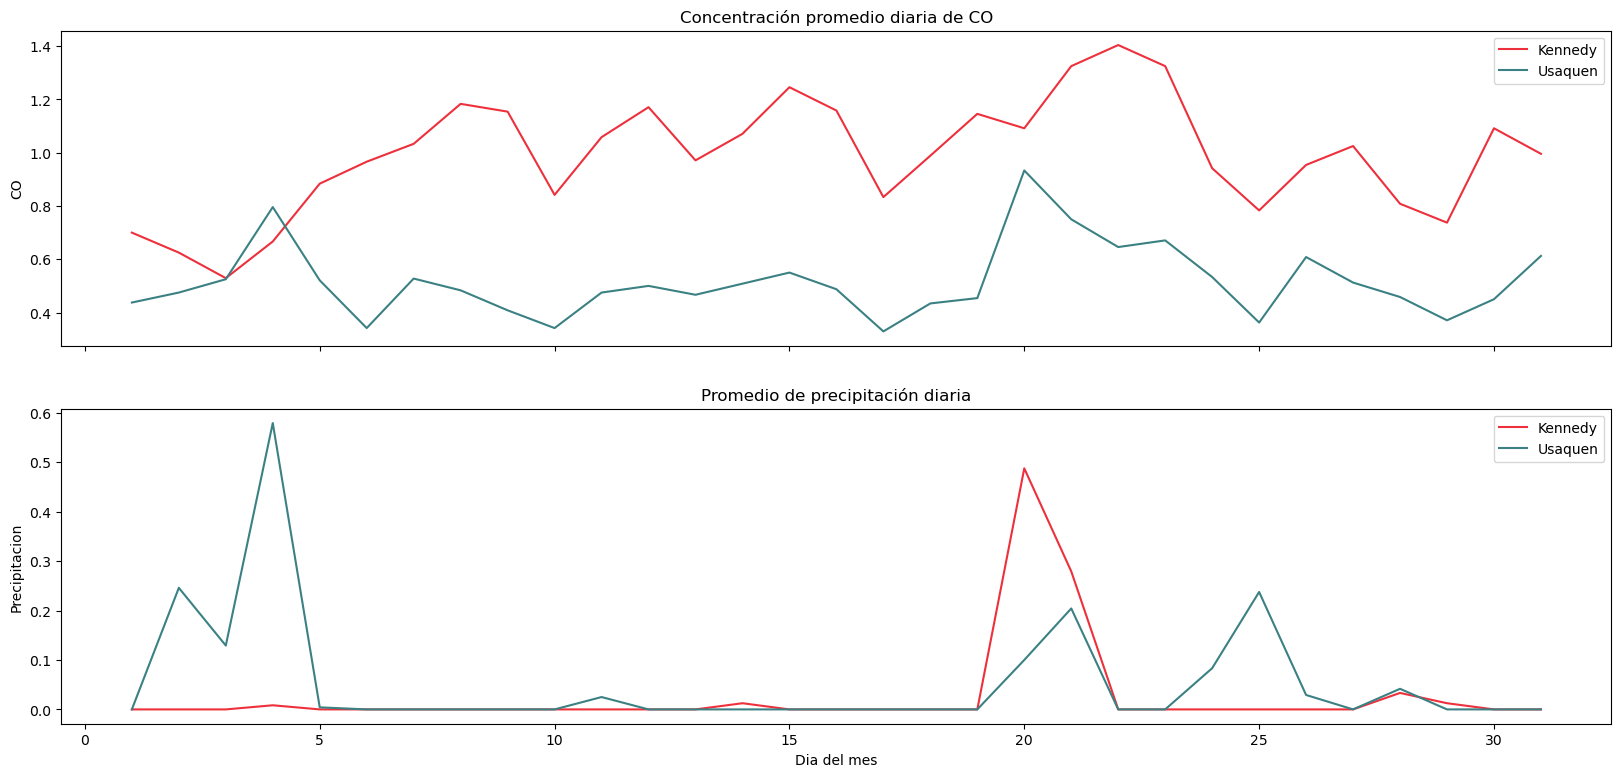

In [51]:
fig, axes = plt.subplots(2,#filas
                         1, #columa
                         figsize=(20,9), 
                         sharex=True
                         )  


#concentración media diaria de CO
sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='CO', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[0])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='CO', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[0])

axes[0].set_title('Concentración promedio diaria de CO')

#precipitación
sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='Precipitacion', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='Precipitacion', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[1])

axes[1].set_title('Promedio de precipitación diaria')

plt.show()

Aparentemente en algunos momentos del mes llovió más en Usaquen. Eso puede contribuir positivamente al 'lavado' del aire haciendo que las particulas suspendidas caigan. 

En cuanto al CO, seguimos viendo una clara diferencia en las concentraciones, manteniendose por debajo en Usaquen. 

Veamos los demás contaminantes:

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

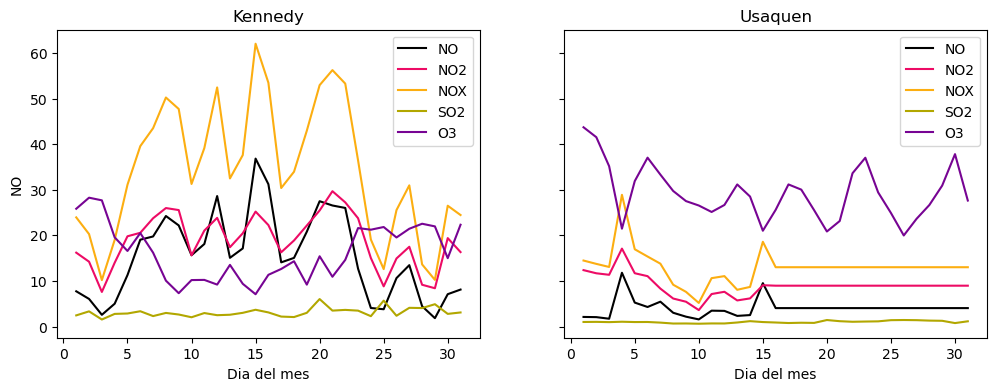

In [52]:
fig, axes = plt.subplots(1,#filas
                         2, #columa
                         figsize=(12,4), 
                         sharey=True,
                         sharex=True
                         )  

#CONTAMINANTES KENNEDY
sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='NO', 
             label = 'NO',
             color = colores_contaminantes['NO'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'NO2', 
             label = 'NO2', 
             color = colores_contaminantes['NO2'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y='NOX', 
             label = 'NOX',
             color = colores_contaminantes['NOX'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'SO2', 
             label = 'SO2', 
             color = colores_contaminantes['SO2'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'OZONO', 
             label = 'O3', 
             color = colores_contaminantes['OZONO'],
             ax=axes[0])

axes[0].set_title('Kennedy')

#concentración 
sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='NO', 
             label = 'NO',
             color = colores_contaminantes['NO'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'NO2', 
             label = 'NO2', 
             color = colores_contaminantes['NO2'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y='NOX', 
             label = 'NOX',
             color = colores_contaminantes['NOX'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'SO2', 
             label = 'SO2', 
             color = colores_contaminantes['SO2'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_dia, 
             x='Dia del mes', 
             y= 'OZONO', 
             label = 'O3', 
             color = colores_contaminantes['OZONO'],
             ax=axes[1])

axes[1].set_title('Usaquen')

plt.show()

En general, los niveles de contaminantes en Kennedy tienden a ser más altos respecto a los que se presentan en Usaquen. Sin embargo llama la atención que los niveles de Ozono en Usaquen son considerablemente más altos que los de Kennedy. Hay que recordar que el Ozono a niveles troposfericos es muy nocivo para la salud humana. 

Ahora, vemos que las lineas de los contaminantes en Usaquen quedan rectas luego del día 15, esto se debe a la imputación de los datos hecha.

Para dar un vistazo diferente, y que la imputación de estos datos no juegue un papel tan importante daremos un vistazo a un dia promedio. Es decir veremos la concentración de los contaminantes en un día promedio. 

Para ello, agruparemos por 'Hora' y sacaremos el promedio de cada uno. Luego graficaremos.

In [53]:

#para evitar problemas con la agrupación convierto tipo de datos 
kennedy = kennedy.astype({'Hora':'string'})

#agrupo y promedio por hora 
kennedy_prom_concentracion_hora = kennedy.groupby('Hora')[[
 'PM10',
 'PM2.5',
 'CO',
 'NO',
 'NO2',
 'NOX',
 'SO2',
 'Temperatura',
 'Precipitacion',
 'OZONO']].mean()

In [54]:
#promedio de concentración marzo por hora: USAQUEN
usaquen = usaquen.astype({'Hora':'string'}) #conversión tipo de dato

#agrupo y promedio por hora
usaquen_prom_concentracion_hora = usaquen.groupby('Hora')[[
 'PM10',
 'PM2.5',
 'CO',
 'NO',
 'NO2',
 'NOX',
 'SO2',
 'Temperatura',
 'Precipitacion',
 'OZONO']].mean()

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

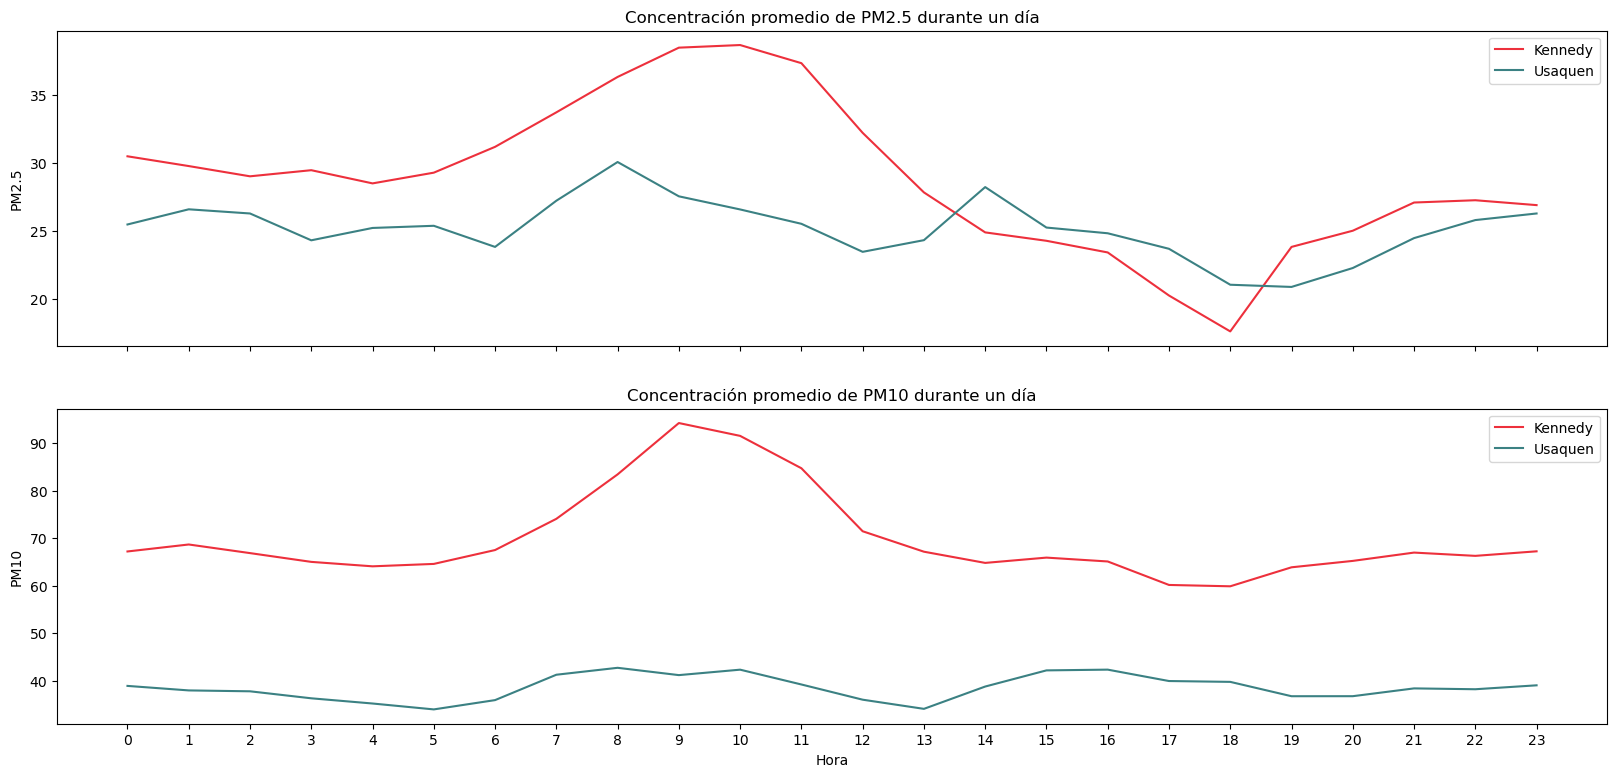

In [55]:
#vamos a graficar lineplots

fig, axes = plt.subplots(2,#filas
                         1, #columa
                         figsize=(20,9), 
                         sharex=True
                         )  

hrs = list(range(0, 25))

#concentración media diaria de PM2.5
sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='PM2.5', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[0])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='PM2.5', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[0])

axes[0].set_title('Concentración promedio de PM2.5 durante un día')
axes[0].set_xticklabels(hrs)

#concentración media diaria de PM10
sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='PM10', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='PM10', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[1])

axes[1].set_title('Concentración promedio de PM10 durante un día')
axes[1].set_xticklabels(hrs)


plt.show()

En general, vemos que la linea de Usaquen se mantiene por debajo de la Kennedy. Curiosamente, a las 18 horas en Kennedy se presenta un descenso de la concentración de PM2.5 muy por debajo de cualquier otra concentración. 

Vemos que las lineas de Kennedy presentan un aumento desde las 6 horas, y presentan picos a las 9 horas. Mientras que en Usaquen aunque se presentan picos a las 8 y a las 14 horas. El pico que se presenta a las 14 horas supera la concentración presentada en Kennedy e incluso se mantiene por encima. 

Queda claro que en cuanto a PM10 las concentraciones promedio presentadas en un día en Kennedy están muy por encima de las que se presentan en Usaquen. 

Kennedy presenta un ascenso de las concentraciones de PM10 con un pico a las 9 horas para luego descender y estabilizarse cerca del medio día. 

Ahora veamos las concentraciones de los demás contaminantes, se comparan aquellos que están en las mismas unidades. 

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

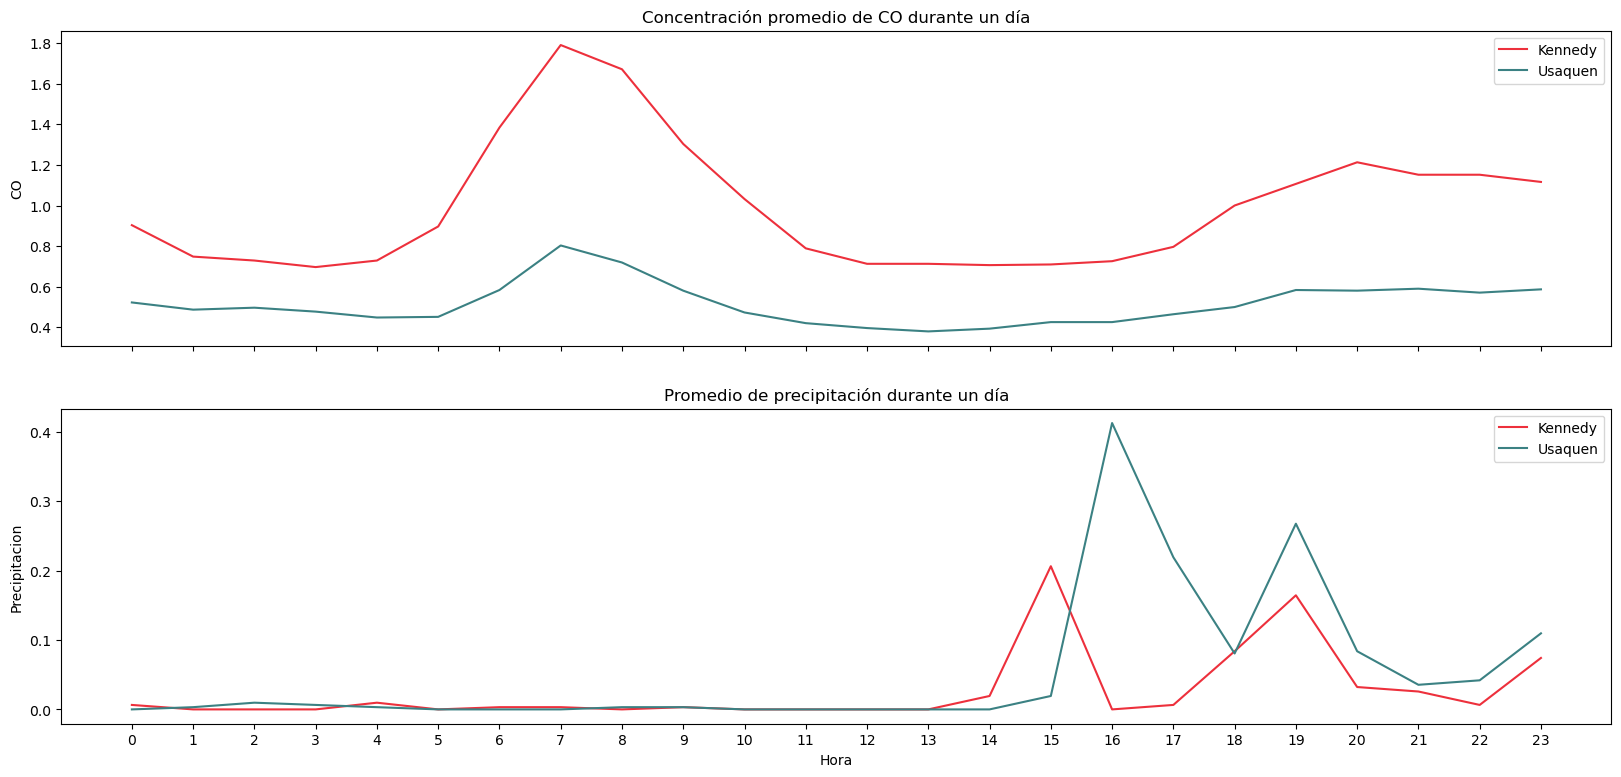

In [56]:
fig, axes = plt.subplots(2,#filas
                         1, #columa
                         figsize=(20,9), 
                         sharex=True
                         )  


#concentración media diaria de CO
sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='CO', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[0])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='CO', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[0])

axes[0].set_title('Concentración promedio de CO durante un día')
axes[0].set_xticklabels(hrs)

#precipitación
sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='Precipitacion', 
             label = 'Kennedy',
             color = color_kennedy ,
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='Precipitacion', 
             label = 'Usaquen', 
             color = color_usaquen,
             ax=axes[1])

axes[1].set_title('Promedio de precipitación durante un día')
axes[1].set_xticklabels(hrs)

plt.show()

La concentración promedio de CO en Usaquen es menor (en gran proporción) a la presentada en Kennedy. Aun así las distribuciones son muy parecidadas. 

También podemos ver que incluso las precipitaciones fueron mayores en Usaquen. Esto contribuye de buena manera en el sentido que al llover hace un 'lavado' del aire que arrastra los contaminantes suspendidos. 

/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/c_laverdeq/anaconda3/envs/data_analytics/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

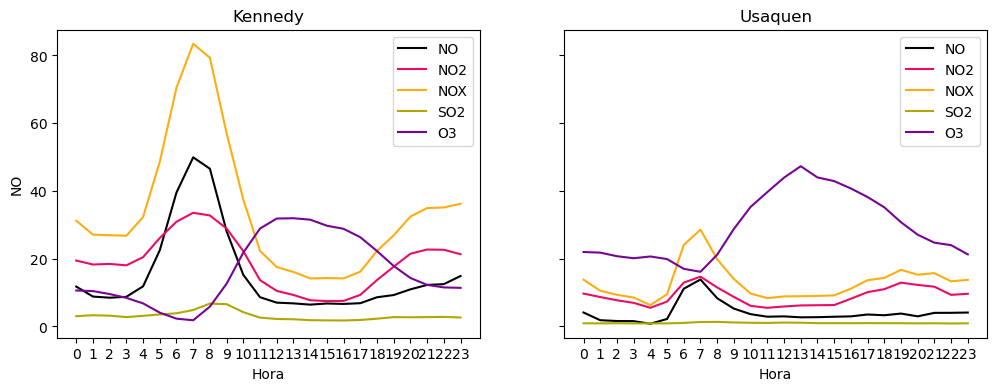

In [58]:
fig, axes = plt.subplots(1,#filas
                         2, #columa
                         figsize=(12,4), 
                         sharey=True,
                         sharex=True
                         )  

#CONTAMINANTES KENNEDY
sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='NO', 
             label = 'NO',
             color = colores_contaminantes['NO'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y= 'NO2', 
             label = 'NO2', 
             color = colores_contaminantes['NO2'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y='NOX', 
             label = 'NOX',
             color = colores_contaminantes['NOX'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y= 'SO2', 
             label = 'SO2', 
             color = colores_contaminantes['SO2'],
             ax=axes[0])

sns.lineplot(data=kennedy_prom_concentracion_hora, 
             x='Hora', 
             y= 'OZONO', 
             label = 'O3', 
             color = colores_contaminantes['OZONO'],
             ax=axes[0])

axes[0].set_title('Kennedy')
axes[0].set_xticklabels(hrs)

#concentración 
sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='NO', 
             label = 'NO',
             color = colores_contaminantes['NO'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y= 'NO2', 
             label = 'NO2', 
             color = colores_contaminantes['NO2'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y='NOX', 
             label = 'NOX',
             color = colores_contaminantes['NOX'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y= 'SO2', 
             label = 'SO2', 
             color = colores_contaminantes['SO2'],
             ax=axes[1])

sns.lineplot(data=usaquen_prom_concentracion_hora, 
             x='Hora', 
             y= 'OZONO', 
             label = 'O3', 
             color = colores_contaminantes['OZONO'],
             ax=axes[1])

axes[1].set_title('Usaquen')

plt.show()

Estos graficos nos muestran que la concentración media de los contaminantes durante un día son menores en su mayoría en Usaquen. Solo el contaminante O3 es mayor. El SO2 tiene unos niveles similares en ambas localidades 

# <center> Conclusiones: 

- Podemos concluir que, al menos en el mes de marzo del presente año, la calidad del aire en la localidad de Usaquen fue mejor que la calidad del aire de la localidad de Kennedy. 

- Se considera el material particulado como un contaminante muy nocivo para la salud humana, por eso en gran parte se intentó dar mayor relevancia en el presente informe. Notando que en Kennedy se excedio en 13 ocasiones el limite máximo permisible para PM10 y en 2 ocasiones el de PM2.5, curiosamente los mismos dias en que se excedio en Usaquen (las unicas dos oportunidades).

- Vemos una clara correlación positiva entre los contamiantes PM10 y PM2.5. Es interesante la correlación entre las demás variables y puede dar paso a un futuro analisis.

- Desde una perspectiva mensual y diaria, las concentraciones de contaminantes en Kennedy fueron mayores respecto a las de Usaquen. Aunque de cierta manera podría estar sesgadas para algunos contaminantes por la imputación de datos hecha. 

- Es curioso que los días lunes los niveles de contaminación por PM10 fueron inferiores a los del resto de la semana en Kennedy, e incluso parace que son los unicos dias en que no se excedió el limite permisible. 

- Otro hecho interesante es que en Usaquen los niveles de Ozono son bastante superiores a los presentados en Kennedy, haciendo hincapie que para esta variable no fue necesaria la imputación de datos.

# <center> Bibliografía:

Unipython. (s.f). ¿QUÉ ES EL ANÁLISIS EXPLORATORIO DE DATOS O EDA?. https://unipython.com/que-es-el-analisis-exploratorio-de-datos/

Gravitar. (2024). Analisis Exploratorio de Datos. https://gravitar.biz/bi/eda/

Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use 
Powerful Industry-standard Tools to Unlock New, Actionable Insights 
From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49). 

Boschetti, A., & Massaron, L. (2016). Python Data Science Essentials -
Second Edition (Vol. 0002). Packt Publishing. (pp. 124-134). 

Samir Madhavan. (2015). Mastering Python for Data Science: Explore the 
World of Data Science Through Python and Learn How to Make Sense of 
Data. Packt Publishing. (pp. 77-106). 
Subramanian, G. (2015). Python Data Science Cookbook. Packt 
Publishing. (pp. 85-126). 

Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. 
(pp. 536 - 563).

Secretaría distritral de ambiente. (s.f). Así funcionan las estaciones de monitoreo de calidad del aire en Bogotá. https://www.ambientebogota.gov.co/search?p_p_id=101&p_p_lifecycle=0&p_p_state=maximized&p_p_mode=view&_101_struts_action=%2Fasset_publisher%2Fview_content&_101_assetEntryId=3349118&_101_type=content&_101_urlTitle=aire-bogota-conoce-como-funcionan-las-estaciones-de-medicion#:~:text=As%C3%AD%20funcionan%20las%20estaciones%20de%20monitoreo%20de%20calidad%20del%20aire%20en%20Bogot%C3%A1&text=En%20Bogot%C3%A1%20hay%2020%20estaciones,de%20contaminantes%20en%20la%20ciudad.

OMS. (2021). Directrices mundiales de la OMS sobre la calidad del aire. https://www.miteco.gob.es/content/dam/miteco/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/guiaoms2021-spa_tcm30-530942.pdf 


Laboratorio Urbano Bogotá. (s.f). Poligonos Localidades. https://bogota-laburbano.opendatasoft.com/explore/dataset/poligonos-localidades/export/?flg=es&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InBvbGlnb25vcy1sb2NhbGlkYWRlcyIsIm9wdGlvbnMiOnsiZmxnIjoiZXMiLCJyZWZpbmUuTm9tYnJlIGRlIGxhIGxvY2FsaWRhZCI6IktFTk5FRFkifX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJDT1VOVCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDczN0MifV0sInhBeGlzIjoiTm9tYnJlIGRlIGxhIGxvY2FsaWRhZCIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9 
